In [1]:
!pip install matplotlib

In [3]:
import urllib.request # 인터넷 주소(URL)를 다루는 도서관(라이브러리)을 가져옴

# 1. 고양이 사진 주소와 저장할 이름
url_cat = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png"
urllib.request.urlretrieve(url_cat, "cat.png")
print("cat.png 다운로드 성공!")

cat.png 다운로드 성공!


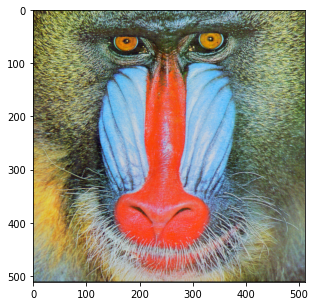

In [4]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np

image_baboon = Image.open('baboon.png')
baboon = np.array(image_baboon)

plt.figure(figsize=(5,5))
plt.imshow(baboon)
plt.show()


In [6]:
A = baboon 
print("baboon's id: " ,id(baboon))
print("A's id: ", id(A))

print("Are these same? ", id(A)==id(baboon))

baboon's id:  2432560530608
A's id:  2432560530608
Are these same?  True


In [7]:
B = baboon.copy() 
print("baboon's id: " ,id(baboon))
print("B(copied)'s id: ", id(B))
print("Are these same? ", id(B)==id(baboon))

baboon's id:  2432560530608
B(copied)'s id:  2432596274416
Are these same?  False


Text(0.5, 1.0, 'B(copied)')

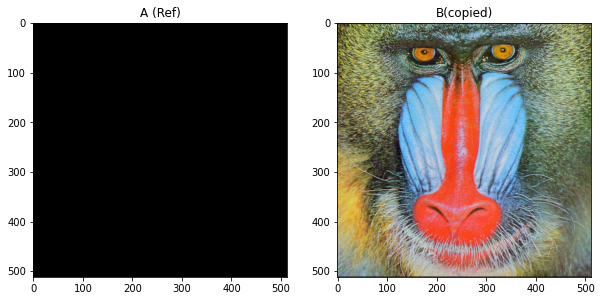

In [11]:
baboon_array = np.array(Image.open('baboon.png'))
A = baboon_array # Shallow copy : 같은 데이터 가리킴
B = baboon_array.copy()

baboon_array[:,:,:] = 0

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(A); plt.title("A (Ref)")
plt.subplot(1,2,2); plt.imshow(B); plt.title("B(copied)")

In [12]:
image_cat = Image.open('cat.png')

array_cat = np.array(image_cat)

height, width, channels = array_cat.shape 
print("Height: ", height)
print("Width: ", width)
print("Channel:", channels)

Height:  733
Width:  490
Channel: 3


Text(0.5, 1.0, 'Flipped')

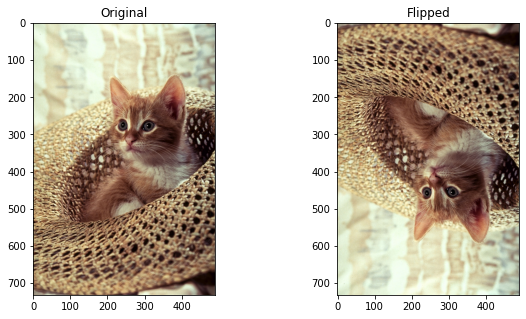

In [17]:
# 원본과 똑같은 크기의 빈 그림
array_flip = np.zeros((height,width,channels),dtype=np.uint8)

# 한줄씩 옮기기
for i,row in enumerate(array_cat):
    array_flip[height-1-i, :,:] = row 

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(array_cat); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(array_flip); plt.title("Flipped")

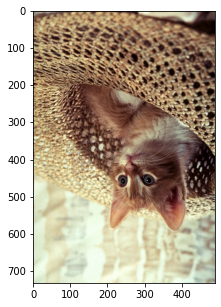

In [18]:
im_flip = image_cat.transpose(Image.FLIP_TOP_BOTTOM)

plt.figure(figsize=(5,5))
plt.imshow(im_flip)
plt.show()

In [19]:
array_cat.shape

(733, 490, 3)

Text(0.5, 1.0, 'crop final')

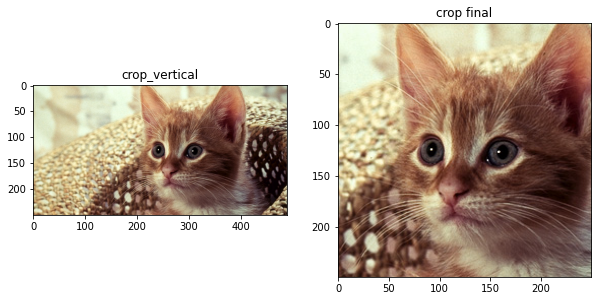

In [21]:
upper = 150
lower = 400
left = 150
right = 400

crop_vertical = array_cat[upper:lower, :, :]
crop_final = crop_vertical[:, left:right, :]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(crop_vertical); plt.title("crop_vertical")
plt.subplot(1,2,2); plt.imshow(crop_final); plt.title("crop final")

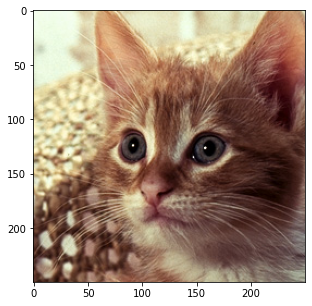

In [22]:
# Crop by pillow
box = (left,upper, right,lower)

crop_image_pil = image_cat.crop(box)

plt.figure(figsize=(5,5))
plt.imshow(crop_image_pil)
plt.show()

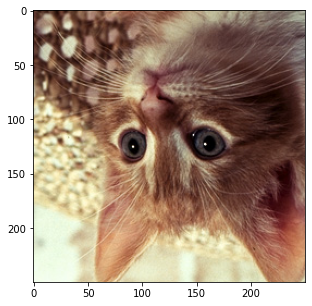

In [23]:
crop_flipped = crop_image_pil.transpose(Image.FLIP_TOP_BOTTOM)

plt.figure(figsize=(5,5))
plt.imshow(crop_flipped)
plt.show()

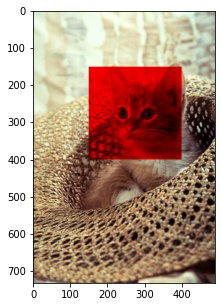

In [24]:
# change pixel color
array_cat_copy = array_cat.copy()

array_cat_copy[upper:lower, left:right, 1:3] = 0
# 1:3 = 1,2 = green, blue

plt.figure(figsize=(5,5))
plt.imshow(array_cat_copy)
plt.show()

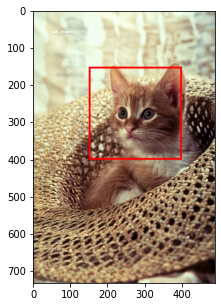

In [29]:
# 이미지 위에 도형 그리기, 글씨 쓰기
from PIL import ImageDraw, ImageFont 

image_draw = image_cat.copy()

draw_fn = ImageDraw.Draw(im=image_draw) 
shape = [left,upper,right,lower]
draw_fn.rectangle(xy=shape, outline='red',width=5) # fill='red'하면 다 채워짐

draw_fn.text(xy=(50,50), text="cat image", fill="white",stroke_fill='black')

plt.figure(figsize=(5,5))
plt.imshow(image_draw)
plt.show()

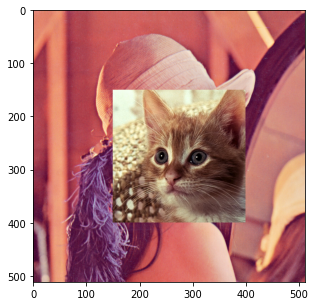

In [32]:
image_lenna = Image.open('lenna.png')

image_lenna.paste(crop_image_pil, (left,upper))
# .paste(붙일이미지, (붙일x좌표, 붙일y좌표))

plt.figure(figsize=(5,5))
plt.imshow(image_lenna)
plt.show()